# We ROLLed dice and tried to see which ones are loaded!

In [5]:
import numpy as np
import random
import sys
import math
import matplotlib.pyplot as plt

In [6]:
#Game of dice. 
#If the house wins we return a one, else zero

def Rolling(PosOut, Probs, ProbsHouse):
    
    Sum1 = 0
    Sum2 = 0
    
    while Sum1 == Sum2:
        
        value1 = np.random.multinomial(n=PosOut, pvals=ProbsHouse)
        value2 = np.random.multinomial(n=PosOut, pvals=Probs)
    
        Sum1 = sum(np.where(value1 !=0)[0]) + 2
        Sum2 = sum(np.where(value2 !=0)[0]) + 2
        
        if len(np.where(value1 !=0)[0]) == 1: #Degeneracies 
            Sum1 = 2*sum(np.where(value1 !=0)[0]) + 2
        elif len(np.where(value2 !=0)[0]) == 1:
            Sum2 = 2*sum(np.where(value2 !=0)[0]) + 2
        
    if Sum2 > Sum1: #House won
        return 0
    else:
        return 1    #House lost
        

In [7]:
#Significance testing
def Alpha_Und_Beta(Dos_Params,alph):
    
    Dos0   = Dos_Params[0]
    Dos1   = Dos_Params[1]
    
    Dos0 = np.array(Dos0) #Transform to numpy array
    Dos1 = np.array(Dos1)

    alpha     = alph #Incorrectly rejected the null 6% of the time - rejecting the null while it's true. 
    crit_val  = Dos0[0][min(int((1-alpha)*len(Dos0[0])),len(Dos0[0])-1)]
    remainder = np.where(Dos1[0] > crit_val)[0][0] 
    beta      = remainder/len(Dos1[0]) #"The portion of the alternative distribution that falls on 
    power     = 1-beta                 # the non-rejection side of the critical value."

    # Most of the data falls within one sigma. Let's use two sigma as or confidence 
    print("This is obtained critical value, beta and power respectively: " + str(crit_val)+" "+str(beta)+" "+ str(power))
    return [crit_val,beta,power,remainder]

In [8]:
# Obtain our probabilities and normalize them
def sum_to_one(p):
    flag = False
    while flag == False:
        s = np.random.normal(size = 6, loc = p)
        normalize1 = abs(s/sum(s))
        if sum(normalize1) == 1:
            flag == True
            return(normalize1)

In [92]:
#Our Experiment!

%%capture
nexp = 1000
roll = 100
univ = 200
dice = 2
location = 0.5
multi_verse = []
poss1 = []
poss2 = []
Stdev = []
Avg    = []

for i in range(0,univ):
    
    probs        = sum_to_one(location)  # [1,2,3,4,5,6]
    probb2       = probs                 # [1,2,3,4,5,6]
    poss1.append(probs)
    poss2.append(probb2)
    
    Expm = [[Rolling(dice, probs, probb2) for i in range(0,roll)] for t in range(0,nexp)] 
    Expm = np.array(Expm)
    
    b = np.sum(Expm,axis=1) # frequency counting for a whole experiment 
    multi_verse.append(b)
    ddos0 = plt.hist(b, roll+1, density=True, facecolor='b', stacked =True, alpha=0.7)
    
    Avg.append(np.mean(ddos0[1]))
    Stdev.append(np.std(ddos0[1]))

52.75
4


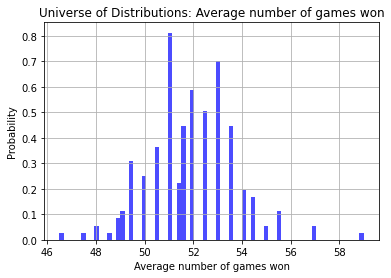

In [211]:
title = "Universe of Distributions: Average number of games won"
multi_b = plt.hist(Avg, 70, density=True, facecolor='b', stacked =True, alpha=0.7)
plt.title(title)
plt.grid()
plt.xlabel("Average number of games won")
plt.ylabel("Probability")


print(np.average(np.round(multi_b[1],2)))
print(round(np.std(multi_b[1])))

In [207]:
# Choose some "distirbution" in our universe and make comparisons to that. 
a = np.where(multi_b[0] == max(multi_b[0]))
print("The location of the most likely # games won " +str(a[0][0]))
print("The value " +str(round(multi_b[1][25])))
print("The probability is: "+str(100*round(multi_b[0][25],4))+"%")

The location of the most likely # games won 25
The value 51
The probability is: 81.2%


### We can try to further extract data from the multiverse of games. Note the above chance of getting 84 given a distribution over a different number of universes of experiments. Rememeber, we are probabilistically samplying face probabilities. We would need a ~2.2 % chance of being "wrong" in rejecting the correct null ("the avg number of games won is about rolls/2") to gauge whether a paticular value is the "correct" one in positing alternative distributions. We thus set the significance halfway between the standard and our multiverse probability. 

In [1]:
%%capture
power0     = []
crit_val0  = []
beta0      = []
remainder0 = []
significance = 0.06
representative = plt.hist(multi_verse[25], roll+1, density=True, facecolor='b', stacked =True, alpha=0.7)

for i in range(0,univ):
    b = plt.hist(multi_verse[i], roll+1, density=True, facecolor='b', stacked =True, alpha=0.7)
    parameters = [representative,b]
    cv0,bt0,p0,remd0 = Alpha_Und_Beta(parameters, significance) 
    
    power0.append(p0)
    crit_val0.append(cv0)
    beta0.append(bt0)
    remainder0.append(remd0)

NameError: name 'plt' is not defined

51


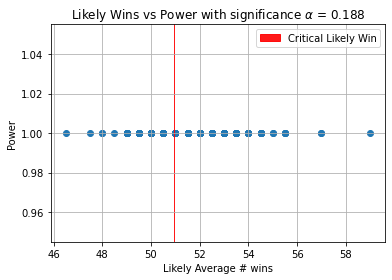

In [275]:
plt.figure()
plt.scatter(Avg,power0)
plt.xlabel("Likely Average # wins")
plt.ylabel("Power")
plt.title("Likely Wins vs Power with significance" + " $\\alpha$ = " +str(significance))

likely_mean_wins = multi_b[1][25]
print(round(likely_mean_wins))
plt.axvspan(likely_mean_wins, mean_wins, alpha=0.9, color='red',label = 'Critical Likely Win')
plt.legend()
plt.grid()
plt.show()

In [218]:
#%%capture
# We will find places where the Std varies greatly with different means.
Stdev = np.array(Stdev)
#print(Stdev)
el = np.where(Stdev < 8)[0]
em = np.where(Stdev > 9)[0]
oh = np.where(Stdev > 10)[0]
pe = np.where(Stdev > 11)[0]

print(el)
print(em)
print(oh)
print(pe)

[77 85]
[  0   1   2   3   4   5   7   8  10  11  14  15  17  18  22  23  24  25
  26  27  28  30  36  38  40  41  42  44  45  46  47  48  49  50  51  53
  54  55  56  57  58  59  60  62  64  65  66  67  70  72  73  75  78  79
  80  82  83  84  86  87  88  89  90  91  92  94  95  96  98  99 101 102
 104 105 106 107 110 111 112 113 114 115 116 117 118 120 122 123 124 125
 127 128 130 133 135 136 137 138 139 141 142 143 144 145 148 150 152 153
 155 156 158 159 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 181 182 183 185 186 187 190 193 194 195 196 198 199]
[  7  17  18  24  26  30  38  45  47  49  51  53  60  67  83  88  89  96
 101 106 107 117 127 137 139 145 150 155 166 168 173 177 179 199]
[ 47  67 177]


The means are: 51.0


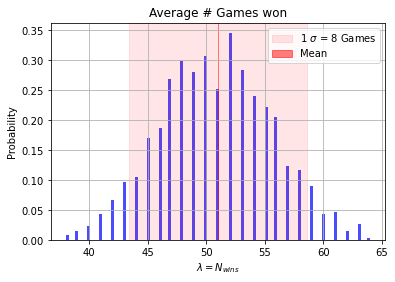

The means are: 53.50000000000001


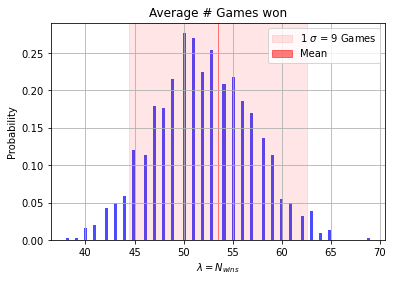

The means are: 52.99999999999999


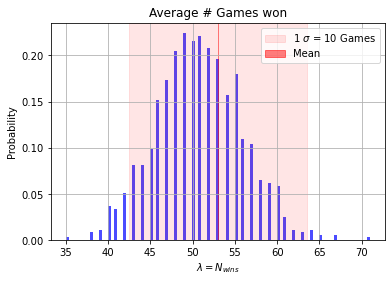

The means are: 48.5


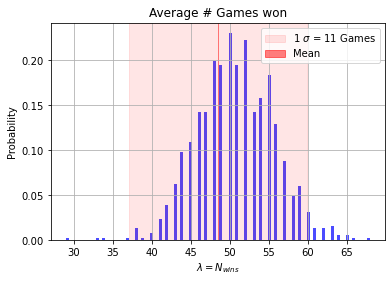

In [270]:
for e in (el[1],em[5],oh[10],pe[1]):
    b = multi_verse[e]
    title = "Average # Games won"
    plt.figure()
    dos0 = plt.hist(b, roll+1, density=True, facecolor='b', stacked =True, alpha=0.7)
    
    sigma0 = np.std(dos0[1])
    mean0 = np.mean(dos0[1])
    
    print("The means are: "+ str(mean0))

    plt.xlabel('$\\lambda = N_{wins}$')
    plt.ylabel('Probability')
    plt.title(title)
    plt.axvspan(mean0-sigma0, sigma0+mean0, alpha=0.1, color='red',label = '1 $\\sigma$ = ' +str(round(sigma0))+" Games")
    plt.axvspan(mean0, mean0, alpha=0.5, color='red',label = 'Mean')
    plt.grid(True)
    plt.legend()
    plt.show()